## Library

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [152]:
# read csc file
economic = pd.read_csv(r"C:\Users\Dharmik\Data\economy.csv")

In [153]:
# read csv file
business = pd.read_csv(r"C:\Users\Dharmik\Data\business.csv")

In [154]:
# add feature both file name class
economic['class'] = 'economic'
business['class'] = 'business'

In [155]:
economic.shape

(206774, 12)

In [156]:
business.shape

(93487, 12)

In [157]:
economic

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economic
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economic
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economic
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economic
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economic
...,...,...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697",economic
206770,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709",economic
206771,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640",economic
206772,31-03-2022,Vistara,UK,822,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640",economic


In [158]:
business

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",business
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",business
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",business
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",business
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",business
...,...,...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265",business
93483,31-03-2022,Vistara,UK,826,12:30,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105",business
93484,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099",business
93485,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585",business


## Concat both file 

In [160]:
# both file concat
df = pd.concat([economic,business], ignore_index=True)

# Save csv file
df.to_csv('aeroplane.csv', index=False)


In [161]:
# top 5 records
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economic
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economic
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economic
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economic
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economic


In [162]:
# last 5 records
df.tail()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
300256,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265",business
300257,31-03-2022,Vistara,UK,826,12:30,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105",business
300258,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099",business
300259,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585",business
300260,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"81,585",business


In [163]:
df.drop(columns=['ch_code','num_code'],inplace=True)

In [164]:
#convert column title each word first character upper
df.columns=df.columns.str.title()

In [165]:
print("Overview of the total no of rows and column:")
df.shape

Overview of the total no of rows and column:


(300261, 10)

In [166]:
print("Overview of the features and their types:")
df.info()

Overview of the features and their types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Date        300261 non-null  object
 1   Airline     300261 non-null  object
 2   Dep_Time    300261 non-null  object
 3   From        300261 non-null  object
 4   Time_Taken  300261 non-null  object
 5   Stop        300261 non-null  object
 6   Arr_Time    300261 non-null  object
 7   To          300261 non-null  object
 8   Price       300261 non-null  object
 9   Class       300261 non-null  object
dtypes: object(10)
memory usage: 22.9+ MB


## Clean Data

In [168]:
#check null values
df.isnull().sum()

Date          0
Airline       0
Dep_Time      0
From          0
Time_Taken    0
Stop          0
Arr_Time      0
To            0
Price         0
Class         0
dtype: int64

In [169]:
#check Stop frequency
df['Stop'].value_counts()

Stop
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t                      243603
non-stop                                                                         36044
2+-stop                                                                          13288
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t                 1839
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t                 1398
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t                674
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t               381
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\t\t\t\t\t\t\t\t\t\t                  354
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia MYQ\n\t\t\t\t\t\t\t\t\t\t\t\t                  321
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t          301
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia KLH\n\t\t\t\t\t\t\t\t\t\t\t\t                  284
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JG

In [170]:
#applies regular expression and extract matching part returns new series
#\ escape match sign
df['Stop'] = df['Stop'].str.extract(r'(non-stop|1-stop|2\+-stop)', expand=False)

In [171]:
#frequency
df['Stop'].value_counts()

Stop
1-stop      250929
non-stop     36044
2+-stop      13288
Name: count, dtype: int64

In [172]:
#remove comma and convert in numeric type
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))

In [173]:
print("Overview of the dataset:")
df.describe()

Overview of the dataset:


,Price
count,300261.000000
mean,20883.717666
std,22695.911266
min,1105.000000
25%,4783.000000
50%,7425.000000
75%,42521.000000
max,123071.000000


In [174]:
# object type 
df.describe(include='object')

,Date,Airline,Dep_Time,From,Time_Taken,Stop,Arr_Time,To,Class
count,300261,300261,300261,300261,300261,300261,300261,300261,300261
unique,49,8,251,6,483,3,266,6,2
top,07-03-2022,Vistara,07:00,Delhi,02h 10m,1-stop,19:55,Mumbai,economic
freq,6633,127859,8760,61345,4242,250929,9194,59109,206774


In [175]:
#convert into datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

#add feature from Date
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month

In [176]:
#create function for departmrnt time into period
def time_to_period(time):
    hour = int(time.split(':')[0]) #find hour from time
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Dep_Period'] = df['Dep_Time'].apply(time_to_period) #apply function
df['Arr_Period'] = df['Arr_Time'].apply(time_to_period)

In [177]:
#all data
df

,Date,Airline,Dep_Time,From,Time_Taken,Stop,Arr_Time,To,Price,Class,Day,Month,Dep_Period,Arr_Period
0,2022-02-11,SpiceJet,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,economic,11,2,Evening,Night
1,2022-02-11,SpiceJet,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,economic,11,2,Morning,Morning
2,2022-02-11,AirAsia,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,economic,11,2,Night,Morning
3,2022-02-11,Vistara,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,economic,11,2,Morning,Afternoon
4,2022-02-11,Vistara,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,economic,11,2,Morning,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,2022-03-31,Vistara,09:45,Chennai,10h 05m,1-stop,19:50,Hyderabad,69265,business,31,3,Morning,Evening
300257,2022-03-31,Vistara,12:30,Chennai,10h 25m,1-stop,22:55,Hyderabad,77105,business,31,3,Afternoon,Night
300258,2022-03-31,Vistara,07:05,Chennai,13h 50m,1-stop,20:55,Hyderabad,79099,business,31,3,Morning,Evening
300259,2022-03-31,Vistara,07:00,Chennai,10h 00m,1-stop,17:00,Hyderabad,81585,business,31,3,Morning,Evening


## Vizulization

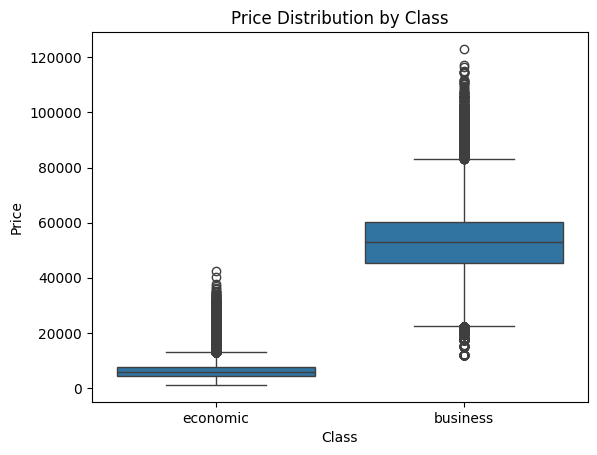

In [179]:
#boxplot help for identify outliers
sns.boxplot(data=df, x='Class', y='Price')
plt.title('Price Distribution by Class')
plt.show()

In [180]:
#here class wise high difference in price so remove outlier class wise
print("Before removing outliers:", df.shape)
def remove_outliers_class(df, class_column='Class', target_column='Price'):
    df_clean = pd.DataFrame() #empty dataframe
    for cls in df[class_column].unique():
        
        class_df = df[df[class_column] == cls] #filter only rows those belong class

        # Calculate IQR for this class
        Q1 = class_df[target_column].quantile(0.25) #25th percentile
        Q3 = class_df[target_column].quantile(0.75) #75th percentile
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # remove outlier
        class_df = class_df[(class_df[target_column] >= lower) & (class_df[target_column] <= upper)]
        #clean rows append
        df_clean = pd.concat([df_clean, class_df], ignore_index=True)

    return df_clean

# apply function
df = remove_outliers_class(df)
print("After removing outliers:", df.shape)

Before removing outliers: (300261, 14)
After removing outliers: (282861, 14)


In [181]:
#train model but price is higher so top and bottom 2% value(outlier) remove
#Global trimming
#keep only 96% of values
q02 = df['Price'].quantile(0.02)
q98 = df['Price'].quantile(0.98)

# keep only ge to 2nd and le 98 percentile
df = df[(df['Price'] >= q02) & (df['Price'] <= q98)]
df

,Date,Airline,Dep_Time,From,Time_Taken,Stop,Arr_Time,To,Price,Class,Day,Month,Dep_Period,Arr_Period
0,2022-02-11,SpiceJet,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,economic,11,2,Evening,Night
1,2022-02-11,SpiceJet,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,economic,11,2,Morning,Morning
2,2022-02-11,AirAsia,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,economic,11,2,Night,Morning
3,2022-02-11,Vistara,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,economic,11,2,Morning,Afternoon
4,2022-02-11,Vistara,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,economic,11,2,Morning,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282851,2022-03-31,Air India,06:10,Chennai,17h 25m,1-stop,23:35,Hyderabad,51345,business,31,3,Morning,Night
282852,2022-03-31,Air India,17:00,Chennai,18h 55m,1-stop,11:55,Hyderabad,51345,business,31,3,Evening,Morning
282853,2022-03-31,Air India,09:55,Chennai,23h 05m,1-stop,09:00,Hyderabad,51345,business,31,3,Morning,Morning
282854,2022-03-31,Air India,06:10,Chennai,26h 50m,1-stop,09:00,Hyderabad,51345,business,31,3,Morning,Morning


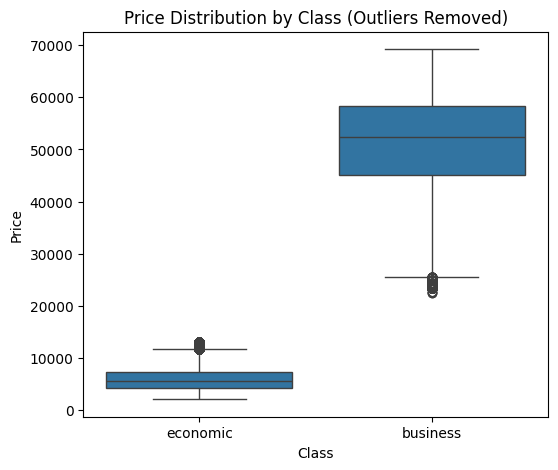

In [182]:
#after removing outliers
plt.figure(figsize=(6, 5))
sns.boxplot(data=df,x='Class', y='Price')
plt.title("Price Distribution by Class (Outliers Removed)")
plt.show()


In [183]:
#frequency
df['Airline'].value_counts()

Airline
Vistara      113504
Air India     74465
Indigo        38535
GO FIRST      22518
AirAsia       14028
SpiceJet       8592
StarAir          45
Trujet           41
Name: count, dtype: int64

In [184]:
#frequency
df['From'].value_counts()

From
Delhi        56615
Mumbai       55293
Bangalore    47230
Kolkata      41641
Hyderabad    37083
Chennai      33866
Name: count, dtype: int64

In [185]:
#frequency
df['To'].value_counts()

To
Delhi        53770
Mumbai       53372
Bangalore    46370
Kolkata      44722
Hyderabad    38607
Chennai      34887
Name: count, dtype: int64

In [186]:
#frequency
df['Airline'].value_counts()

Airline
Vistara      113504
Air India     74465
Indigo        38535
GO FIRST      22518
AirAsia       14028
SpiceJet       8592
StarAir          45
Trujet           41
Name: count, dtype: int64

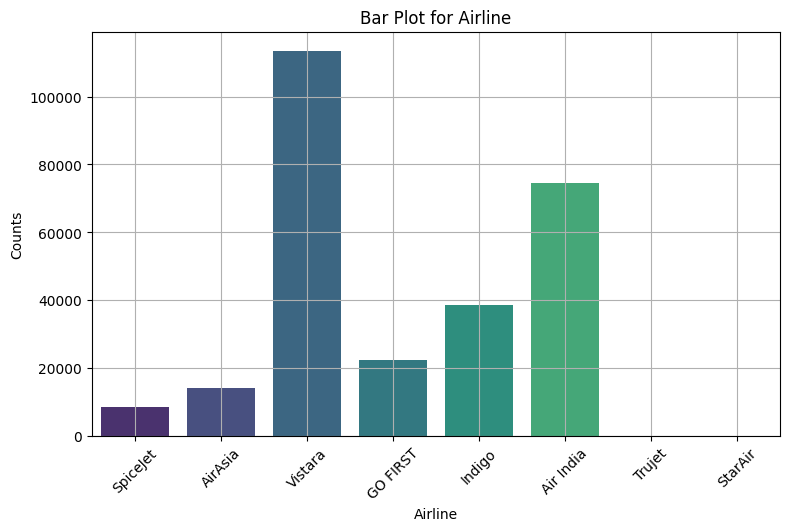

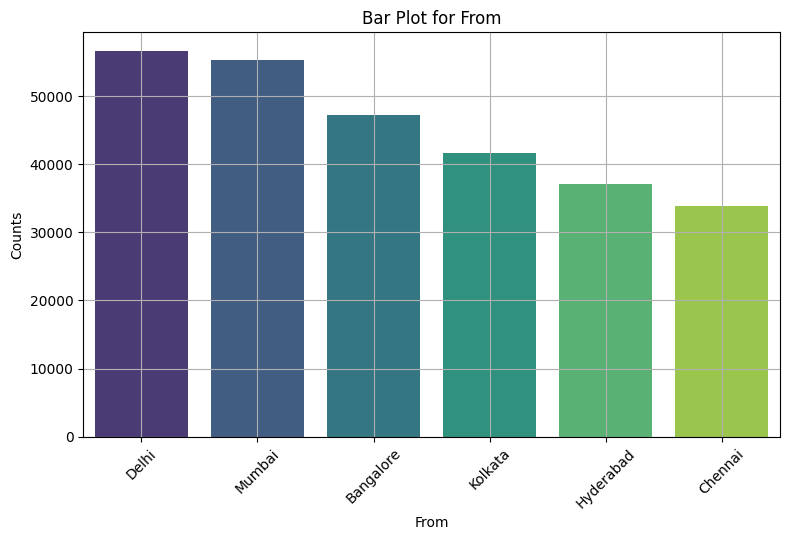

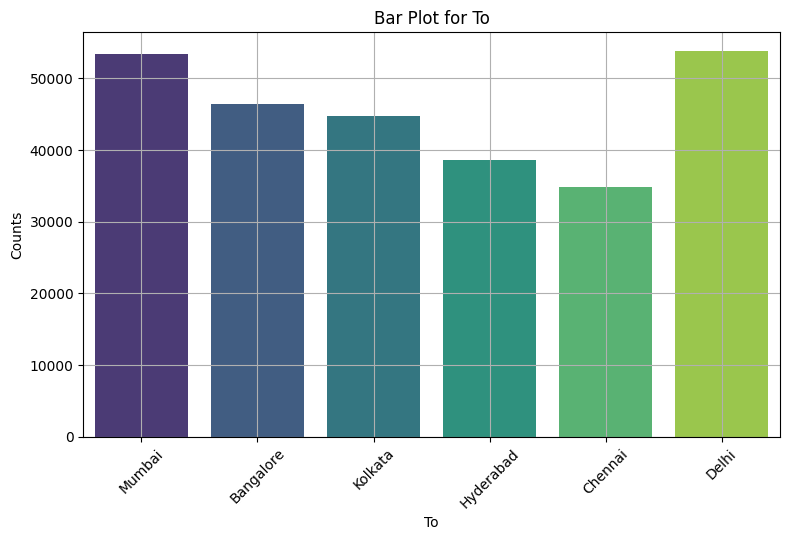

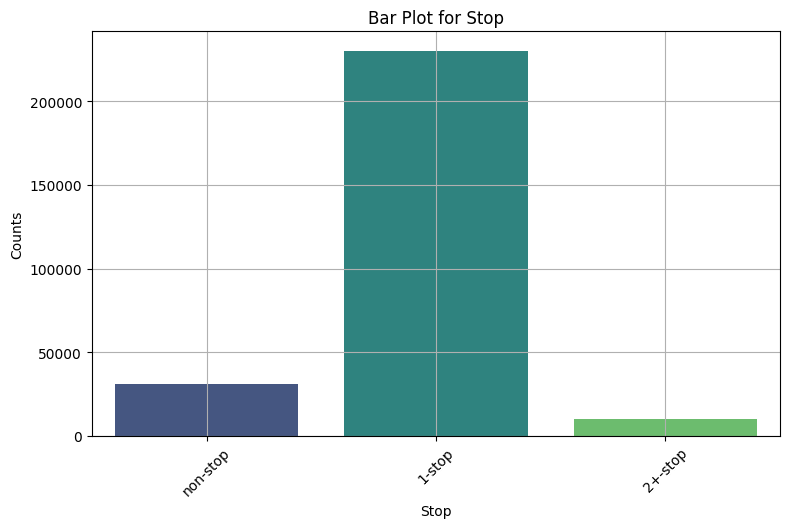

In [187]:
#use visualization for frequency count
data = ['Airline','From','To','Stop']
for col in data:
    plt.figure(figsize=(8, 5)) #size of figure
    sns.countplot(x=df[col],palette='viridis') #use countplot and color
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.title(f'Bar Plot for {col}')
    #work for label/title overlap
    plt.tight_layout()
    plt.xticks(rotation=45)#on x-axis rotate name
    plt.grid(True) #add grid on horizontal
    # Display the plot
    plt.show()
    

## Price by class

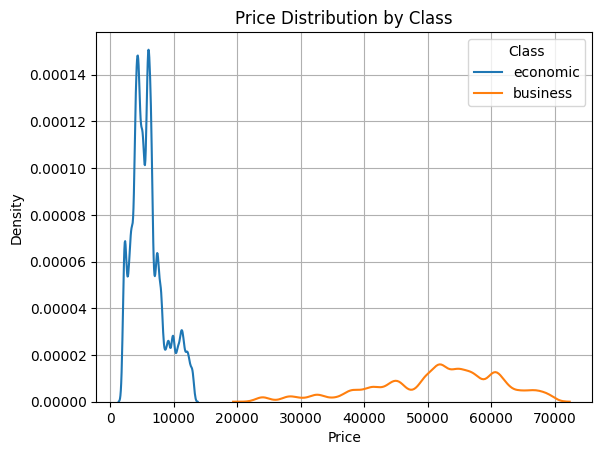

In [189]:
#show density of price
sns.kdeplot(data=df, x='Price', hue='Class')
plt.title('Price Distribution by Class')
plt.grid(True)
plt.show()

Economy is a sharper,narrower(more concentrated) and Buisness wider curve(more variance in prices).

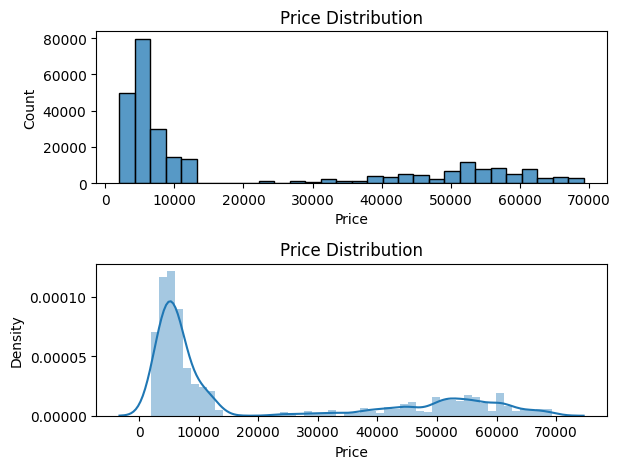

In [191]:
plt.subplot(2,1,1) #1
#for use frequency and count
sns.histplot(df['Price'],bins=30)
plt.title('Price Distribution')

plt.subplot(2,1,2) #2
#for use smooth density curve and distribution
sns.distplot(df['Price'])
plt.title('Price Distribution')

plt.tight_layout()
plt.show()

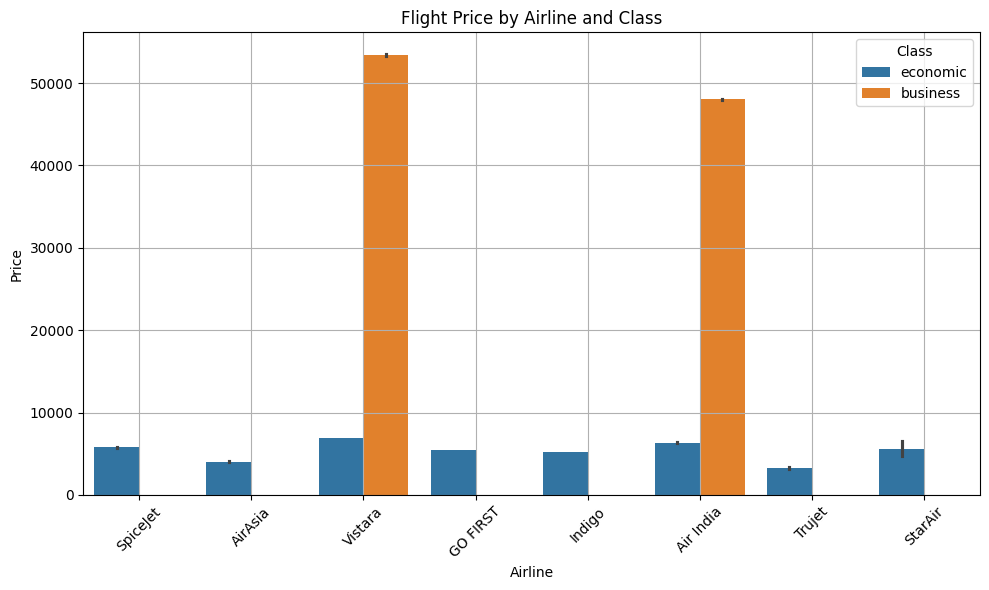

In [192]:
#know class wise price distribution
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Airline', y='Price', hue='Class')
plt.title('Flight Price by Airline and Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


## AveragePrice Distribution

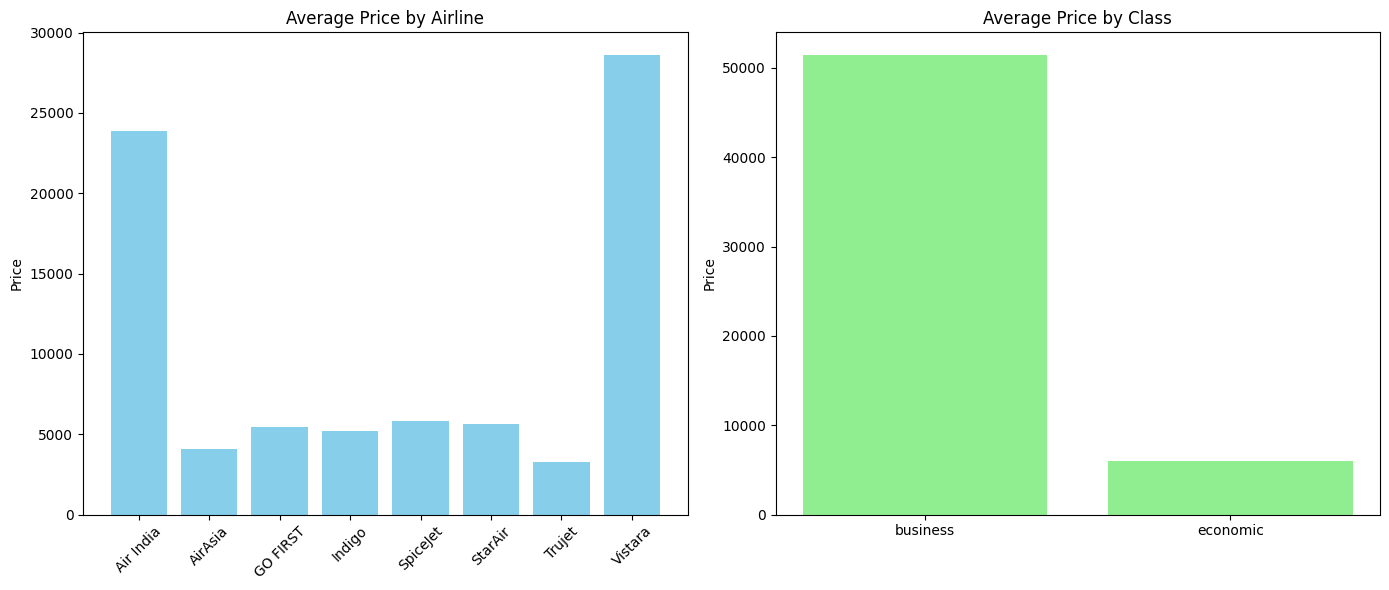

In [194]:
airline_avg = df.groupby("Airline")["Price"].mean().reset_index()
class_avg = df.groupby("Class")["Price"].mean().reset_index()

plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.bar(airline_avg["Airline"], airline_avg["Price"], color='skyblue')
plt.title("Average Price by Airline")
plt.xticks(rotation=45)
plt.ylabel("Price")

plt.subplot(1, 2, 2)
plt.bar(class_avg["Class"], class_avg["Price"], color='lightgreen')
plt.title("Average Price by Class")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

price gap is high in class wise.

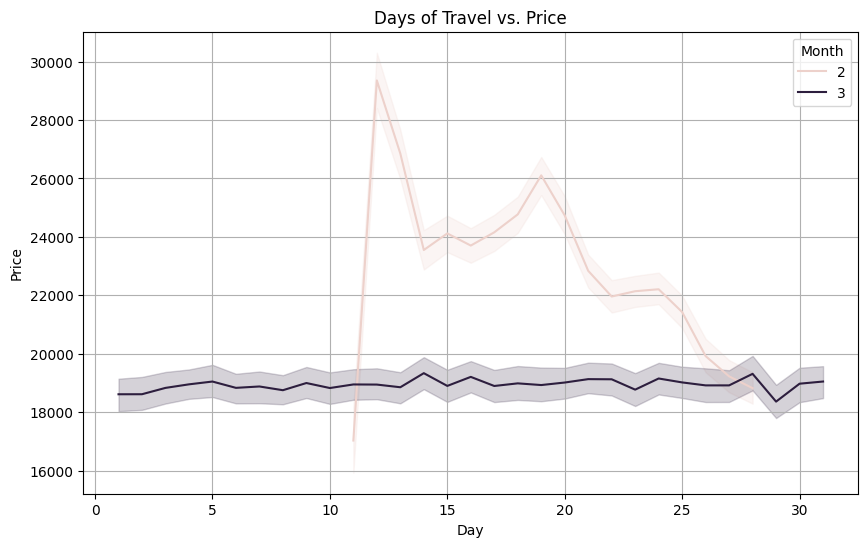

In [196]:
#Month of Travel vs Price
plt.figure(figsize=(10, 6))
sns.lineplot(x='Day', y='Price', data=df,hue='Month')
plt.title('Days of Travel vs. Price')
plt.grid(True)
plt.show()


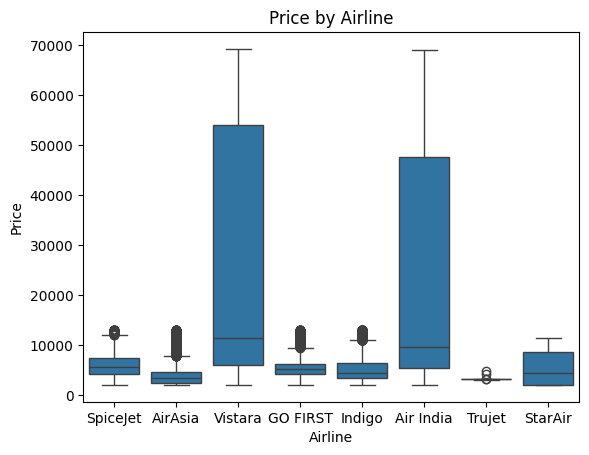

In [197]:
sns.boxplot(x='Airline', y='Price', data=df)
plt.title("Price by Airline")
plt.show()

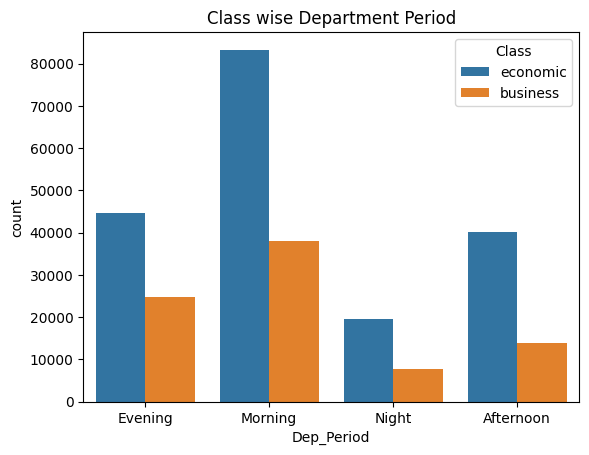

In [198]:
sns.countplot(x='Dep_Period', hue='Class', data=df)
plt.title("Class wise Department Period")
plt.show()

## Route wise analysis

route
Delhi->Mumbai        14154
Mumbai->Delhi        13663
Delhi->Bangalore     13466
Bangalore->Delhi     13229
Bangalore->Mumbai    11584
Mumbai->Bangalore    11566
Mumbai->Kolkata      11461
Delhi->Kolkata       10643
Kolkata->Mumbai      10381
Mumbai->Hyderabad     9963
Name: count, dtype: int64


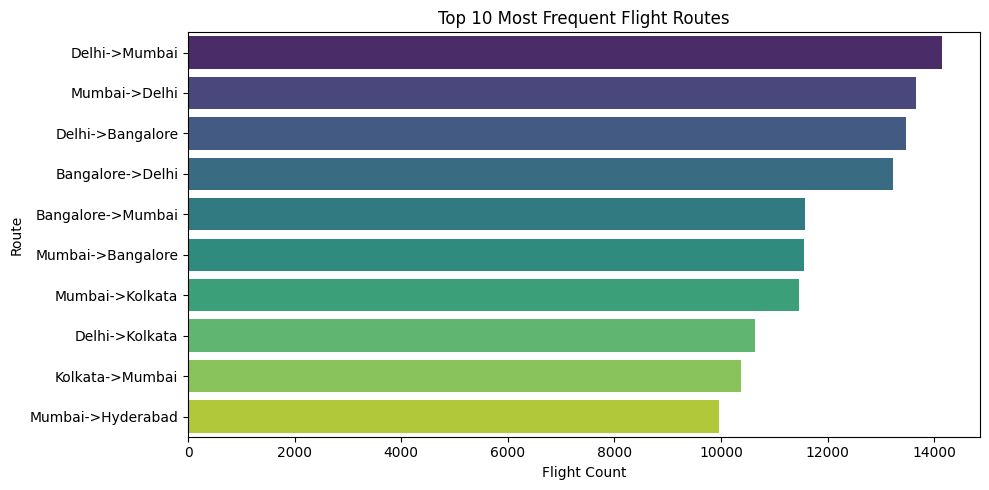

In [200]:
df['route'] = df['From'] + '->' + df['To']

route_total = df['route'].value_counts().head(10)
print(route_total)

plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='route', order=route_total.index, palette='viridis')
plt.title('Top 10 Most Frequent Flight Routes')
plt.xlabel('Flight Count')
plt.ylabel('Route')
plt.tight_layout()
plt.show()

## Encoding 

In [202]:
for col in df.select_dtypes(include='object').columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("-" * 40)

Column: Airline
['SpiceJet' 'AirAsia' 'Vistara' 'GO FIRST' 'Indigo' 'Air India' 'Trujet'
 'StarAir']
----------------------------------------
Column: Dep_Time
['18:55' '06:20' '04:25' '10:20' '08:50' '11:40' '09:30' '14:20' '08:00'
 '15:00' '10:30' '07:15' '12:00' '08:45' '07:00' '19:00' '06:25' '05:50'
 '19:25' '17:50' '15:30' '17:15' '08:20' '19:45' '18:40' '06:05' '13:50'
 '17:35' '16:05' '14:15' '09:05' '08:05' '04:55' '19:20' '21:35' '13:30'
 '09:45' '06:10' '21:15' '17:00' '17:45' '13:20' '20:40' '09:50' '15:50'
 '07:20' '19:50' '19:40' '21:00' '18:50' '10:50' '18:00' '20:00' '14:30'
 '05:15' '08:10' '13:40' '12:55' '20:35' '14:05' '21:50' '12:45' '10:00'
 '10:15' '10:25' '17:10' '07:30' '14:45' '22:15' '10:55' '15:45' '20:15'
 '16:55' '06:00' '18:10' '09:35' '13:00' '17:40' '16:40' '17:55' '09:10'
 '11:30' '06:50' '19:15' '06:30' '09:00' '12:20' '09:15' '12:50' '05:55'
 '05:35' '16:30' '11:10' '11:50' '17:20' '15:55' '19:55' '17:25' '16:15'
 '18:25' '05:45' '16:45' '20:45' '13:4

In [203]:
df

,Date,Airline,Dep_Time,From,Time_Taken,Stop,Arr_Time,To,Price,Class,Day,Month,Dep_Period,Arr_Period,route
0,2022-02-11,SpiceJet,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,economic,11,2,Evening,Night,Delhi->Mumbai
1,2022-02-11,SpiceJet,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,economic,11,2,Morning,Morning,Delhi->Mumbai
2,2022-02-11,AirAsia,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,economic,11,2,Night,Morning,Delhi->Mumbai
3,2022-02-11,Vistara,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,economic,11,2,Morning,Afternoon,Delhi->Mumbai
4,2022-02-11,Vistara,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,economic,11,2,Morning,Morning,Delhi->Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282851,2022-03-31,Air India,06:10,Chennai,17h 25m,1-stop,23:35,Hyderabad,51345,business,31,3,Morning,Night,Chennai->Hyderabad
282852,2022-03-31,Air India,17:00,Chennai,18h 55m,1-stop,11:55,Hyderabad,51345,business,31,3,Evening,Morning,Chennai->Hyderabad
282853,2022-03-31,Air India,09:55,Chennai,23h 05m,1-stop,09:00,Hyderabad,51345,business,31,3,Morning,Morning,Chennai->Hyderabad
282854,2022-03-31,Air India,06:10,Chennai,26h 50m,1-stop,09:00,Hyderabad,51345,business,31,3,Morning,Morning,Chennai->Hyderabad


In [204]:
#drop unnecessary columns
df.drop(columns=['Date','Dep_Time','Arr_Time',
                 'Time_Taken','route','Month'],inplace=True)

In [205]:
from sklearn.preprocessing import OrdinalEncoder

#ordinal encoder use 
ordinal_cols = ['Dep_Period', 'Arr_Period', 'Class', 'Stop']
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df[ordinal_cols] = oe.fit_transform(df[ordinal_cols])

In [206]:
#One-hot encode for nominal columns
cat_columns = ['Airline', 'From', 'To']
#convert into binary
#ignore means test data not seen training its ignore,sparse return numpy array not matrix
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe_encoded = ohe.fit_transform(df[cat_columns])
ohe_encoded_df = pd.DataFrame(ohe_encoded, columns=ohe.get_feature_names_out(cat_columns))
#Drop original categorical columns and concat one-hot columns
df = df.drop(columns=cat_columns)
df = pd.concat([df.reset_index(drop=True), ohe_encoded_df.reset_index(drop=True)], axis=1)


In [207]:
print(df.columns.tolist())

['Stop', 'Price', 'Class', 'Day', 'Dep_Period', 'Arr_Period', 'Airline_Air India', 'Airline_AirAsia', 'Airline_GO FIRST', 'Airline_Indigo', 'Airline_SpiceJet', 'Airline_StarAir', 'Airline_Trujet', 'Airline_Vistara', 'From_Bangalore', 'From_Chennai', 'From_Delhi', 'From_Hyderabad', 'From_Kolkata', 'From_Mumbai', 'To_Bangalore', 'To_Chennai', 'To_Delhi', 'To_Hyderabad', 'To_Kolkata', 'To_Mumbai']


In [208]:
#check types
df.dtypes

Stop                 float64
Price                  int64
Class                float64
Day                    int32
Dep_Period           float64
Arr_Period           float64
Airline_Air India    float64
Airline_AirAsia      float64
Airline_GO FIRST     float64
Airline_Indigo       float64
Airline_SpiceJet     float64
Airline_StarAir      float64
Airline_Trujet       float64
Airline_Vistara      float64
From_Bangalore       float64
From_Chennai         float64
From_Delhi           float64
From_Hyderabad       float64
From_Kolkata         float64
From_Mumbai          float64
To_Bangalore         float64
To_Chennai           float64
To_Delhi             float64
To_Hyderabad         float64
To_Kolkata           float64
To_Mumbai            float64
dtype: object

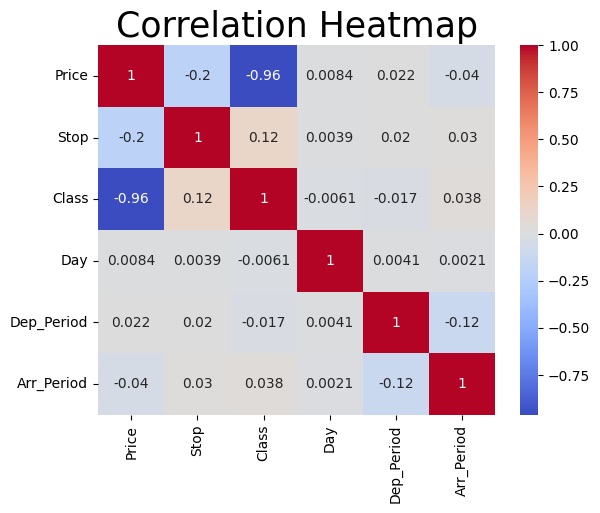

In [209]:
# Assuming df is your main DataFrame
numeric_df = df[['Price', 'Stop', 'Class', 'Day','Dep_Period','Arr_Period']]  # extract numerical columns

# Compute correlation
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap", fontsize=25)
plt.show()


## Train and Test Data

In [211]:
df.isnull().sum()

Stop                 0
Price                0
Class                0
Day                  0
Dep_Period           0
Arr_Period           0
Airline_Air India    0
Airline_AirAsia      0
Airline_GO FIRST     0
Airline_Indigo       0
Airline_SpiceJet     0
Airline_StarAir      0
Airline_Trujet       0
Airline_Vistara      0
From_Bangalore       0
From_Chennai         0
From_Delhi           0
From_Hyderabad       0
From_Kolkata         0
From_Mumbai          0
To_Bangalore         0
To_Chennai           0
To_Delhi             0
To_Hyderabad         0
To_Kolkata           0
To_Mumbai            0
dtype: int64

In [212]:
print("Max Price:", df['Price'].max())
print("Min Price:", df['Price'].min())

Max Price: 69244
Min Price: 2051


In [213]:
df

,Stop,Price,Class,Day,Dep_Period,Arr_Period,Airline_Air India,Airline_AirAsia,Airline_GO FIRST,Airline_Indigo,...,From_Delhi,From_Hyderabad,From_Kolkata,From_Mumbai,To_Bangalore,To_Chennai,To_Delhi,To_Hyderabad,To_Kolkata,To_Mumbai
0,2.0,5953,1.0,11,1.0,3.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.0,5953,1.0,11,2.0,2.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.0,5956,1.0,11,3.0,2.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2.0,5955,1.0,11,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2.0,5955,1.0,11,2.0,2.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271723,0.0,51345,0.0,31,2.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
271724,0.0,51345,0.0,31,1.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
271725,0.0,51345,0.0,31,2.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
271726,0.0,51345,0.0,31,2.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [214]:
df['Stop'].value_counts()

Stop
0.0    230408
2.0     31101
1.0     10219
Name: count, dtype: int64

In [215]:
X=df.drop('Price',axis=1)
y = np.log1p(df['Price'])#skewed data and large outliers
#target value

In [216]:
#train 80% and test 20% model
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Model Building

## Linear Regression

In [219]:
#transform all columns mean=0 and std=1,for balanced weight calaculate
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model1 = LinearRegression()
model1.fit(X_train_scaled, y_train)

print(f"Training Score: {model1.score(X_train_scaled, y_train)}")
print(f"Testing Score: {model1.score(X_test_scaled, y_test)}")  
y_pred = model1.predict(X_test_scaled)

r2score = r2_score (y_test,y_pred)
print('R2 Score is: {}'.format(r2score))   
    
print(f"MAE:{mean_absolute_error(y_test,y_pred)}")
print(f"MSE:{mean_squared_error(y_test,y_pred)}")
print(f"RMSE:{np.sqrt(mean_squared_error(y_test,y_pred))}")


Training Score: 0.9137019153007336
Testing Score: 0.9136087631677219
R2 Score is: 0.9136087631677219
MAE:0.2485164248752688
MSE:0.10317681639027979
RMSE:0.32121148234501173


## DecisionTree Regressor

In [221]:
#this not distance based so not need scaler,split data by feature thresholds
model2 = DecisionTreeRegressor()
model2.fit(X_train,y_train)

print(f"Training Score:{model2.score(X_train,y_train)} ")
print(f"Testing Score:{model2.score(X_test,y_test)} ")   
y_pred = model2.predict(X_test)
    
r2score = r2_score (y_test,y_pred)
print('R2 Score is: {}'.format(r2score))   

    
print(f"MAE:{mean_absolute_error(y_test,y_pred)}")
print(f"MSE:{mean_squared_error(y_test,y_pred)}")
print(f"RMSE:{np.sqrt(mean_squared_error(y_test,y_pred))}")



Training Score:0.9582174755471086 
Testing Score:0.9147813885605319 
R2 Score is: 0.9147813885605319
MAE:0.20806535061921788
MSE:0.10177635311084518
RMSE:0.3190240635294541


## RandomForestRegressor

In [223]:
model3 = RandomForestRegressor()
model3.fit(X_train,y_train)

print(f"Training Score:{model3.score(X_train,y_train)} ")
print(f"Testing Score:{model3.score(X_test,y_test)} ")   
y_pred = model3.predict(X_test)
    
r2score = r2_score (y_test,y_pred)
print('R2 Score is: {}'.format(r2score))   

    
print(f"MAE:{mean_absolute_error(y_test,y_pred)}")
print(f"MSE:{mean_squared_error(y_test,y_pred)}")
print(f"RMSE:{np.sqrt(mean_squared_error(y_test,y_pred))}")


Training Score:0.9574524643484517 
Testing Score:0.925973212180644 
R2 Score is: 0.925973212180644
MAE:0.20018992596359644
MSE:0.08840998896251685
RMSE:0.29733817273017077


In [224]:


model4 = XGBRegressor(objective='reg:squarederror',learning_rate=0.05,)
model4.fit(X_train, y_train)

print(f"Training Score:{model3.score(X_train,y_train)} ")
print(f"Testing Score:{model3.score(X_test,y_test)} ")   
y_pred = model4.predict(X_test)

r2score = r2_score (y_test,y_pred)
print('R2 Score is: {}'.format(r2score))   

    
print(f"MAE:{mean_absolute_error(y_test,y_pred)}")
print(f"MSE:{mean_squared_error(y_test,y_pred)}")
print(f"RMSE:{np.sqrt(mean_squared_error(y_test,y_pred))}")


Training Score:0.9574524643484517 
Testing Score:0.925973212180644 
R2 Score is: 0.9352551452437217
MAE:0.20961162987353255
MSE:0.07732460185021879
RMSE:0.27807301532190926


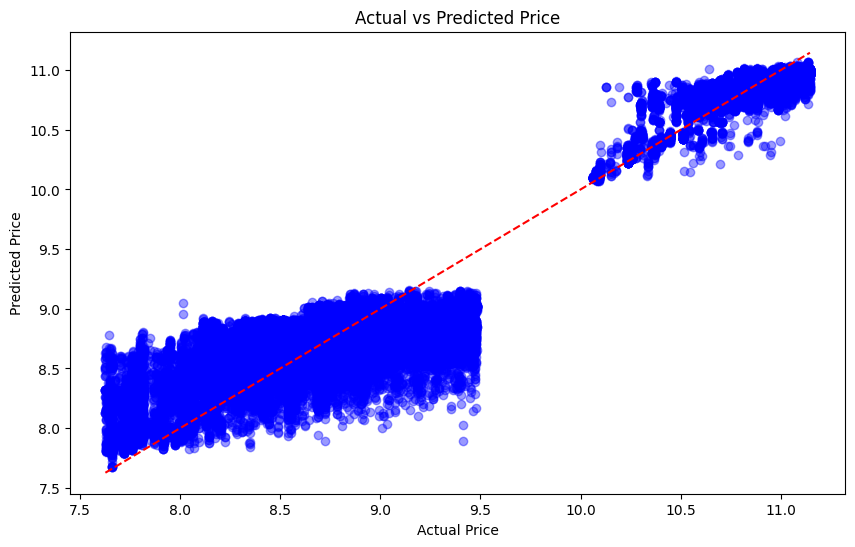

In [225]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.4, color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],color='red',linestyle='--')
 
plt.show()

red line is idle line means perfectly match actual values y=x.

High-priced tickets (log(Price) > 10) – points lie close to the line.
Low to mid-range tickets – slightly more spread, indicating minor under/over-predictions.
The clustered vertical bands are due to repeated values in categorical features or bucketed times (e.g., Dep_Period, Arr_Period).

In [228]:
df.dtypes

Stop                 float64
Price                  int64
Class                float64
Day                    int32
Dep_Period           float64
Arr_Period           float64
Airline_Air India    float64
Airline_AirAsia      float64
Airline_GO FIRST     float64
Airline_Indigo       float64
Airline_SpiceJet     float64
Airline_StarAir      float64
Airline_Trujet       float64
Airline_Vistara      float64
From_Bangalore       float64
From_Chennai         float64
From_Delhi           float64
From_Hyderabad       float64
From_Kolkata         float64
From_Mumbai          float64
To_Bangalore         float64
To_Chennai           float64
To_Delhi             float64
To_Hyderabad         float64
To_Kolkata           float64
To_Mumbai            float64
dtype: object

## Select model2 beacause high R2 Score and Lowest RMSE & MAE for Most accurate prediction

In [230]:
import joblib

# Save model
joblib.dump(model4, "flight_price_model.pkl")

# Save encoders
joblib.dump(oe, "ordinal_encoder.pkl")
joblib.dump(ohe, "onehot_encoder.pkl")
joblib.dump(X_train.columns.tolist(), "feature_columns.pkl")

print("Model and encoders saved.")


Model and encoders saved.
